In [2]:
import pandas as pd 

df = pd.read_csv(r"C:\Users\Thushar Mohan\OneDrive\Desktop\Python Sample Data\Regression\tvmarketing.csv")
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [3]:
df.head()


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
df.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [5]:
df.info

<bound method DataFrame.info of         TV  Sales
0    230.1   22.1
1     44.5   10.4
2     17.2    9.3
3    151.5   18.5
4    180.8   12.9
..     ...    ...
195   38.2    7.6
196   94.2    9.7
197  177.0   12.8
198  283.6   25.5
199  232.1   13.4

[200 rows x 2 columns]>

In [6]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [7]:
df.shape

(200, 2)

<Axes: xlabel='Sales', ylabel='TV'>

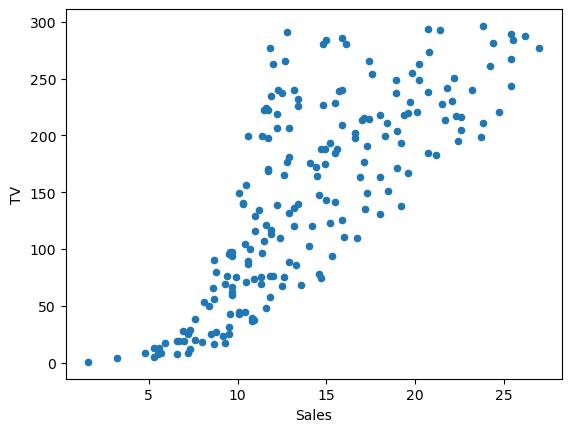

In [8]:
df.plot(x='Sales', y='TV', kind='scatter')

### Simple Linear Regression 

In [9]:
x = df['TV']
x.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [10]:
y = df['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, random_state=0000)

In [26]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [27]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [28]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [29]:
import numpy as np 

In [34]:
x_train = np.array(x_train)[:, np.newaxis]
x_test = np.array(x_test)[:, np.newaxis]

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(60, 1)
(140,)
(60,)


### Performing Linear Regression  

In [39]:
from sklearn.linear_model import LinearRegression 

In [41]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [44]:
print("Intercept = ", lr.intercept_)
print("Coefficient = ", lr.coef_)

Intercept =  7.310810165411681
Coefficient =  [0.04581434]


In [46]:
y_pred = lr.predict(x_test)
y_pred

array([10.48116264,  9.60152727, 11.4524267 , 20.58322509, 15.1084112 ,
        9.8855762 ,  7.70939494, 18.31083372,  8.40119151, 16.36372418,
       19.28209777, 11.3058208 , 14.48533615, 15.91474363, 10.81102591,
       12.81769409, 19.47909945,  7.3428802 , 10.73314153, 17.08759078,
       20.48701497, 13.73856237, 15.33290148, 13.34455903,  9.76187747,
       12.95055569, 14.89766523, 16.70275031, 17.57322281,  8.46075015,
       10.41702256, 16.42328282, 20.17089601, 18.38413667,  7.91555948,
        8.16753836, 10.04134496, 15.59404323, 10.44451117,  8.45616872,
        9.00135939,  8.75396194, 13.85767966, 16.91349628, 17.17921947,
       12.01594311,  7.70481351,  8.08507255, 13.06967298, 12.10299036,
       12.34122494, 17.82520169, 18.93849021, 15.78188203,  9.35871126,
       10.16504368, 20.72983099, 15.21378419, 16.58821446,  7.64525486])

In [47]:
type(y_pred)

numpy.ndarray

In [48]:
y_test.shape

(60,)

Text(0, 0.5, 'Sales')

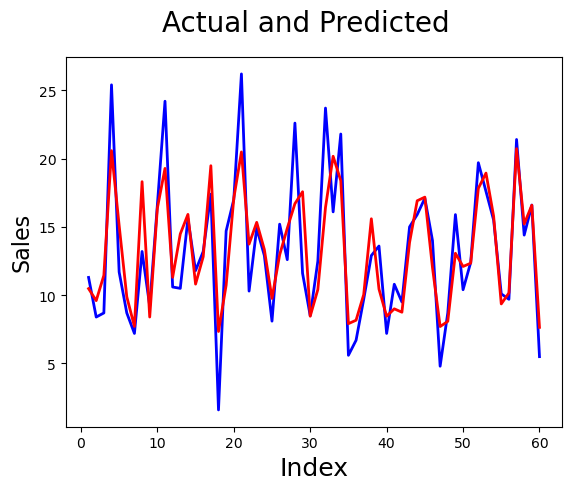

In [49]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0.5, 0, 'Index')

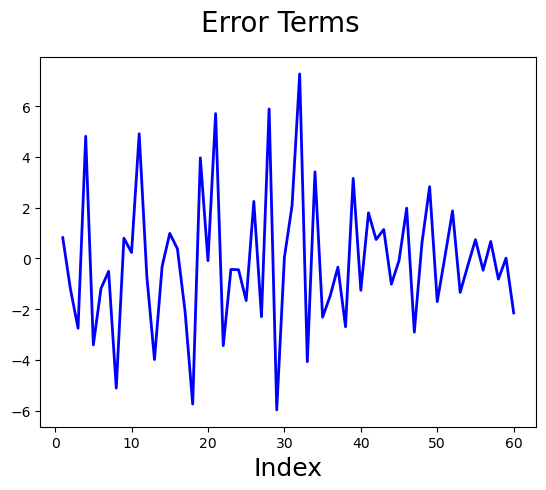

In [50]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                      # X-label

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
mse = mean_squared_error(y_test, y_pred)

In [53]:
r_squared = r2_score(y_test, y_pred)

In [54]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.497479593464674
r_square_value : 0.725606346597073


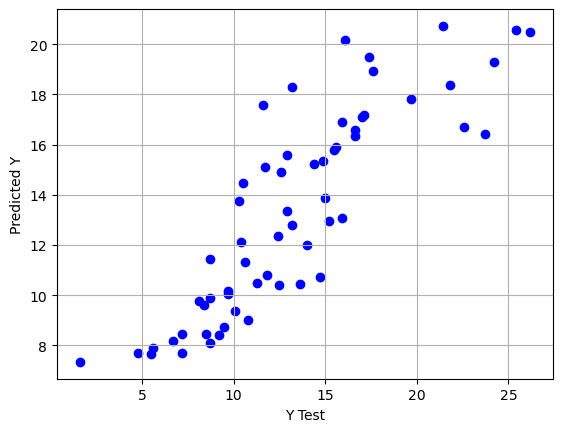

In [55]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()